In [3]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression

In [2]:
dat=np.loadtxt('dat.txt')
dat2=np.loadtxt('kappa.txt')
dat3=np.loadtxt('periodo.txt')
dat4=np.loadtxt('corriente.txt')

PUNTO 1: Radianes y Voltaje

In [8]:
reg=LinearRegression().fit(dat[:,0].reshape((-1, 1)),dat[:,1])
reg1=LinearRegression().fit(dat[:,1].reshape((-1, 1)),dat[:,0])

In [32]:
print('R2 de la primera gráfica: ' + str(reg.score(dat[:,0].reshape((-1, 1)),dat[:,1])))
print('R2 de la segunda gráfica: ' + str(reg1.score(dat[:,1].reshape((-1, 1)),dat[:,0])))

R2 de la primera gráfica: 0.9994049895907613
R2 de la segunda gráfica: 0.9994049895907613


In [18]:
def f1(x):
    a=reg.coef_
    b=reg.intercept_
    return a*x + b

def f2(x):
    a=reg1.coef_
    b=reg1.intercept_
    return a*x + b

In [30]:
print('Para la primera gráfica, la pendiente es: ' + str(reg.coef_[0]) + ' y el intercepto es: ' + str(reg.intercept_))
print('Para la segunda gráfica, la pendiente es: ' + str(reg1.coef_[0]) + ' y el intercepto es: ' + str(reg1.intercept_))

Para la primera gráfica, la pendiente es: 1969.6612903225805 y el intercepto es: -39.20000000000003
Para la segunda gráfica, la pendiente es: 0.0005073994165905978 y el intercepto es: 0.019890057130351448


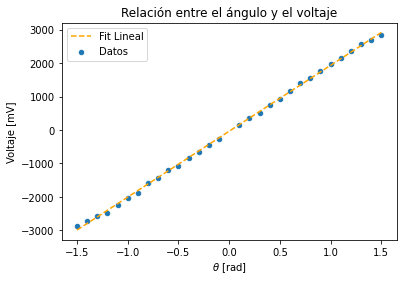

In [80]:
x=np.linspace(-1.5,1.5,100)
plt.scatter(dat[:,0],dat[:,1],s=20, label='Datos')
plt.plot(x,f1(x),'--',c='orange',label='Fit Lineal')
plt.legend(loc=0.0)
plt.xlabel(r'$\theta$ [rad]')
plt.ylabel('Voltaje [mV]')
plt.title('Relación entre el ángulo y el voltaje')
plt.savefig('voltaje_angulo.png')

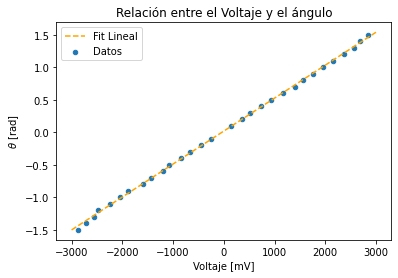

In [81]:
x1=np.linspace(-3000,3000,100)
plt.scatter(dat[:,1],dat[:,0],s=20, label='Datos')
plt.plot(x1,f2(x1),'--',c='orange',label='Fit Lineal')
plt.legend(loc=0.0)
plt.xlabel('Voltaje [mV]')
plt.ylabel(r'$\theta$ [rad]')
plt.title('Relación entre el Voltaje y el ángulo')
plt.savefig('angulo_voltaje.png')

PUNTO 2: Constante de torsión del cable

In [33]:
reg2=LinearRegression().fit(dat2[:,0].reshape((-1, 1)),dat2[:,1])

In [35]:
print('R2 de la gráfica: ' + str(reg2.score(dat2[:,0].reshape((-1, 1)),dat2[:,1])))

R2 de la gráfica: 0.9887852706964076


In [36]:
def g(x):
    a=reg2.coef_
    b=reg2.intercept_
    return a*x + b

In [37]:
print('Para la gráfica, la pendiente es: ' + str(reg2.coef_[0]) + ' y el intercepto es: ' + str(reg2.intercept_))

Para la gráfica, la pendiente es: -0.0814064737090551 y el intercepto es: 0.0008140647370905509


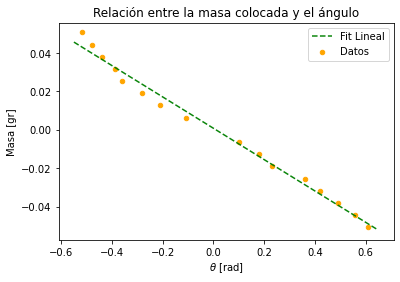

In [82]:
y=np.linspace(-0.55,0.65,100)
plt.scatter(dat2[:,0],dat2[:,1],s=20, label='Datos',c='orange')
plt.plot(y,g(y),'--', label='Fit Lineal', c='green',alpha=12)
plt.legend(loc=0.0)
plt.xlabel(r'$\theta$ [rad]')
plt.ylabel('Masa [gr]')
plt.title('Relación entre la masa colocada y el ángulo')
plt.savefig('masa_angulo.png')

PUNTO 3: Relación entre el Periodo y el Torque

In [51]:
reg3=LinearRegression().fit(dat3[:,0].reshape((-1, 1)),dat3[:,1])

In [52]:
print('R2 de la gráfica: ' + str(reg3.score(dat3[:,0].reshape((-1, 1)),dat3[:,1])))

R2 de la gráfica: 0.9940712475330289


In [53]:
def h(x):
    a=reg3.coef_
    b=reg3.intercept_
    return a*x + b

In [54]:
print('Para la gráfica, la pendiente es: ' + str(reg3.coef_[0]) + ' y el intercepto es: ' + str(reg3.intercept_))

Para la gráfica, la pendiente es: 0.1841516666666667 y el intercepto es: 1.37106


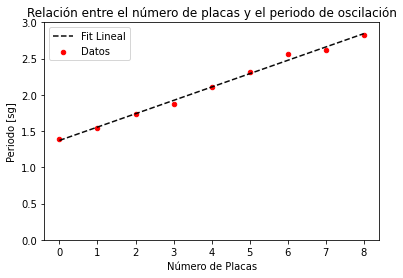

In [83]:
a=np.linspace(0,8,100)
plt.scatter(dat3[:,0],dat3[:,1],s=20, label='Datos',c='red')
plt.plot(a,h(a),'--', label='Fit Lineal', c='black',alpha=12)
plt.legend(loc=0.0)
plt.ylim((0,3))
plt.xlabel('Número de Placas')
plt.ylabel('Periodo [sg]')
plt.title('Relación entre el número de placas y el periodo de oscilación')
plt.savefig('placas_periodo.png')

PUNTO 4: Corriente y Voltaje

In [61]:
c=dat4[:,0]
d=dat4[:,1]

In [65]:
theta=f2(d)
norm=theta/np.cos(theta)

In [66]:
reg4=LinearRegression().fit(c.reshape((-1, 1)),norm)

In [67]:
print('R2 de la gráfica: ' + str(reg4.score(c.reshape((-1, 1)),norm)))

R2 de la gráfica: 0.9994689920051222


In [68]:
def t(x):
    a=reg4.coef_
    b=reg4.intercept_
    return a*x + b

In [69]:
print('Para la gráfica, la pendiente es: ' + str(reg4.coef_[0]) + ' y el intercepto es: ' + str(reg4.intercept_))

Para la gráfica, la pendiente es: 0.7222013498683107 y el intercepto es: -0.002720927606734551


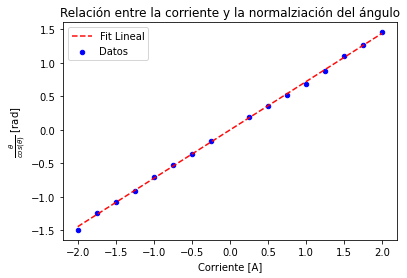

In [85]:
w=np.linspace(-2,2,100)
plt.scatter(c,norm,s=20, label='Datos',c='blue')
plt.plot(w,t(w),'--', label='Fit Lineal', c='red',alpha=12)
plt.legend(loc=0.0)
plt.xlabel('Corriente [A]')
plt.ylabel(r'$\frac{\theta}{cos(\theta)}$ [rad]')
plt.title('Relación entre la corriente y la normalziación del ángulo')
plt.savefig('norm_corriente.png')